In [1]:
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel("Male" if train_labels[i] == 0 else "Female")
    plt.show()

In [3]:
def read_and_add_to_dataset(folder, label, dataset, labels):
    target_width = 60  # Adjust these values as needed
    target_height = 60

    for filename, i in zip(os.listdir(folder),range(5000)):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # You can specify the image file extensions you have
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
            
            if img is not None:
                img = cv2.resize(img, (target_width, target_height))
                dataset.append(img.reshape(target_height*target_width))
                labels.append(label)

male_folder_train = '/home/coberndorm/Documents/Semestre_IX/Linear_Algebra_In_Data_Science/Taller_1/Punto_2/Training/male'
female_folder_train = '/home/coberndorm/Documents/Semestre_IX/Linear_Algebra_In_Data_Science/Taller_1/Punto_2/Training/female'

dataset_train = []
labels_train = []

# Read male images and add them to the dataset with label 0
read_and_add_to_dataset(male_folder_train, 0, dataset_train, labels_train)

# Read female images and add them to the dataset with label 1
read_and_add_to_dataset(female_folder_train, 1, dataset_train, labels_train)


male_folder_valid = '/home/coberndorm/Documents/Semestre_IX/Linear_Algebra_In_Data_Science/Taller_1/Punto_2/Validation/male'
female_folder_valid = '/home/coberndorm/Documents/Semestre_IX/Linear_Algebra_In_Data_Science/Taller_1/Punto_2/Validation/female'

dataset_valid = []
labels_valid = []

# Read male images and add them to the dataset with label 0
read_and_add_to_dataset(male_folder_valid, 0, dataset_valid, labels_valid)

# Read female images and add them to the dataset with label 1
read_and_add_to_dataset(female_folder_valid, 1, dataset_valid, labels_valid)


In [4]:
dataset_train = np.array(dataset_train); labels_train=np.array(labels_train)
dataset_valid = np.array(dataset_valid); labels_valid=np.array(labels_valid)

: 

In [ ]:
data = np.hstack((dataset_train, labels_train.reshape(-1,1)))
dataset_train = np.random.permutation(data)

dataset_valid = np.hstack((dataset_valid, labels_valid.reshape(-1,1)))

In [ ]:
dataset_train[0]

array([ 44,  37,  35, ..., 143, 115,   1])

In [ ]:
# Normalization
labels_train, dataset_train = dataset_train[:,-1], dataset_train[:,:-1]/255
labels_valid, dataset_valid = dataset_valid[:,-1], dataset_valid[:,:-1]/255

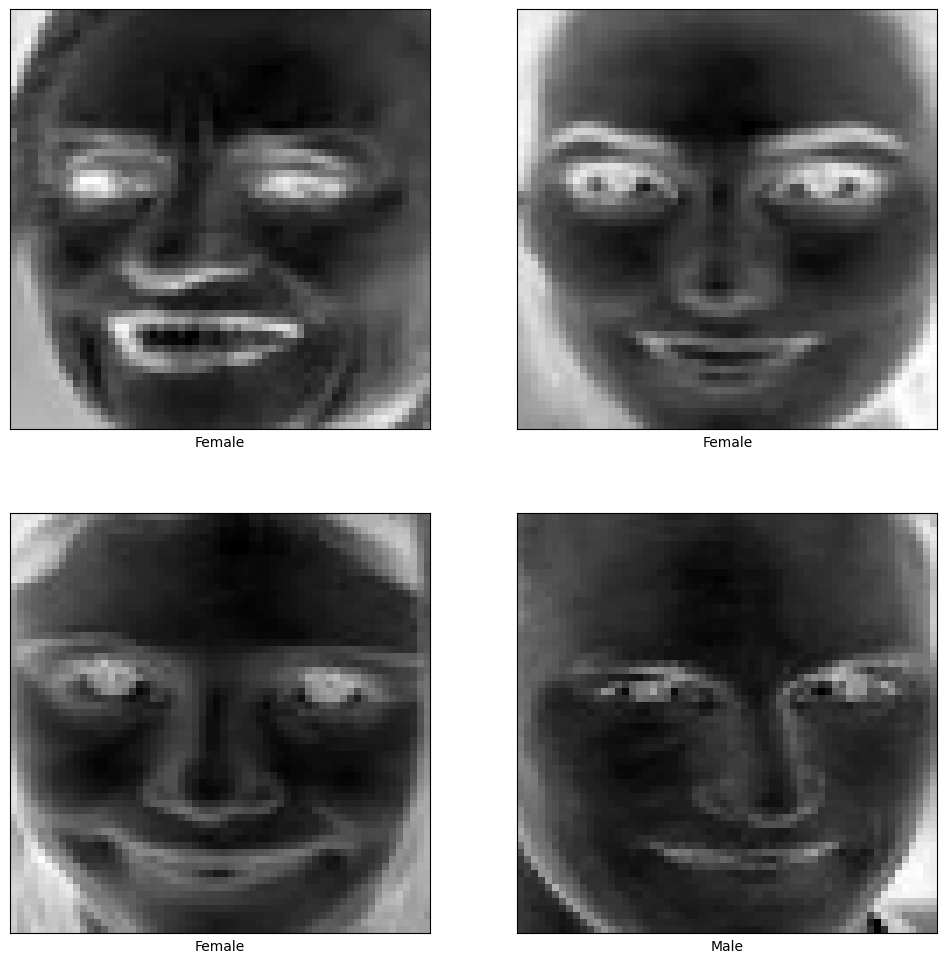

In [ ]:
img = np.array([x.reshape(60,60) for x in dataset_train[0:100,:]])
show_images(img, None, labels_train[0:100], nb_samples=4, nb_row=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = "euclidean", p = 2)
classifier.fit(dataset_train, labels_train)

NameError: name 'dataset_train' is not defined

In [ ]:
classifier.score(dataset_valid, labels_valid)

0.7564

In [ ]:
y_pred = classifier.predict(dataset_valid)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(labels_valid, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(labels_valid, y_pred))

Confusion Matrix:
 [[4572  428]
 [2008 2992]]
Accuracy Score:  0.7564
